In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import time

In [2]:
#Read CSV files

Clean_df=pd.read_csv("clean_data.csv")
youtube_df=pd.read_csv("team_statistics_df.csv",encoding="ISO-8859-1",sep=";")
youtube_df

,Team,Subscriber_Count,Youtube_Compound_Score,View_Count
0,Fnatic,323073,0.351237,35207380
1,G2 Esports,88430,-0.018238,6988252
2,Splyce,10903,0.249024,532979
3,Vitality,34766,0.127185,1734004
4,ROCCAT,177313,0.121082,12217414
5,Misfits Gaming,9937,0.193417,850439
6,H2K,21116,0.274111,2766980
7,FC Schalke 04 Esports,3619,0.200500,217155
8,Giants,22093,0.158916,1331208
9,Unicorns of Love,20320,0.012209,1518114


In [3]:
Clean_df=pd.read_csv("clean_data.csv",encoding="ISO-8859-1",sep=";")
Clean_df


,Team,Twitter_Compound_Score,Region,Wins,Losses,Win_Rate
0,100 Thieves,0.172566,North America,13,6,0.684211
1,Cloud9,0.138294,North America,12,8,0.600000
2,Clutch Gaming,0.217552,North America,11,9,0.550000
3,Counter Logic Gaming,0.311433,North America,7,11,0.388889
4,Echo Fox,0.260797,North America,12,7,0.631579
5,FC Schalke 04 Esports,-0.094096,Europe,7,11,0.388889
6,FlyQuest,0.249222,North America,6,12,0.333333
7,Fnatic,0.221487,Europe,14,4,0.777778
8,G2 Esports,0.236911,Europe,12,7,0.631579
9,Giants,0.262449,Europe,7,11,0.388889


In [4]:

Merged_df=pd.merge(Clean_df,youtube_df, on="Team")
Merged_df

,Team,Twitter_Compound_Score,Region,Wins,Losses,Win_Rate,Subscriber_Count,Youtube_Compound_Score,View_Count
0,100 Thieves,0.172566,North America,13,6,0.684211,139501,0.304155,2679560
1,Cloud9,0.138294,North America,12,8,0.600000,204420,0.169371,20305310
2,Clutch Gaming,0.217552,North America,11,9,0.550000,2245,0.146872,55209
3,Counter Logic Gaming,0.311433,North America,7,11,0.388889,69465,0.055084,5202114
4,Echo Fox,0.260797,North America,12,7,0.631579,16680,0.108620,972556
5,FC Schalke 04 Esports,-0.094096,Europe,7,11,0.388889,3619,0.200500,217155
6,FlyQuest,0.249222,North America,6,12,0.333333,4129,0.443267,193456
7,Fnatic,0.221487,Europe,14,4,0.777778,323073,0.351237,35207380
8,G2 Esports,0.236911,Europe,12,7,0.631579,88430,-0.018238,6988252
9,Giants,0.262449,Europe,7,11,0.388889,22093,0.158916,1331208


In [7]:
Average_Compound_Score = []
for i,row in Merged_df.iterrows():
    Average_Compound_Score.append((row['Twitter_Compound_Score'] + row['Youtube_Compound_Score'])/2)
   
Merged_df['Average_Compound_Score'] = Average_Compound_Score
Merged_df

,Team,Twitter_Compound_Score,Region,Wins,Losses,Win_Rate,Subscriber_Count,Youtube_Compound_Score,View_Count,Average_Compound_Score
0,100 Thieves,0.172566,North America,13,6,0.684211,139501,0.304155,2679560,0.238360
1,Cloud9,0.138294,North America,12,8,0.600000,204420,0.169371,20305310,0.153832
2,Clutch Gaming,0.217552,North America,11,9,0.550000,2245,0.146872,55209,0.182212
3,Counter Logic Gaming,0.311433,North America,7,11,0.388889,69465,0.055084,5202114,0.183259
4,Echo Fox,0.260797,North America,12,7,0.631579,16680,0.108620,972556,0.184709
5,FC Schalke 04 Esports,-0.094096,Europe,7,11,0.388889,3619,0.200500,217155,0.053202
6,FlyQuest,0.249222,North America,6,12,0.333333,4129,0.443267,193456,0.346244
7,Fnatic,0.221487,Europe,14,4,0.777778,323073,0.351237,35207380,0.286362
8,G2 Esports,0.236911,Europe,12,7,0.631579,88430,-0.018238,6988252,0.109337
9,Giants,0.262449,Europe,7,11,0.388889,22093,0.158916,1331208,0.210682


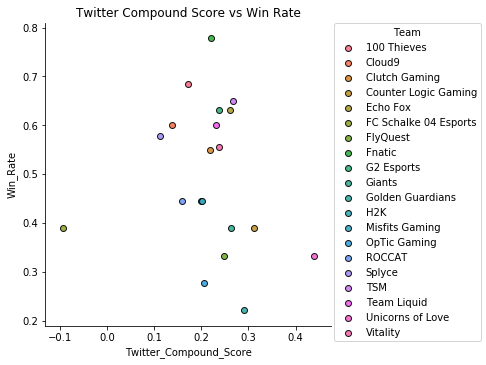

In [8]:
#Create bubble plot using seaborn and matplotlib libraries
sns.lmplot(x='Twitter_Compound_Score', y='Win_Rate', data=Merged_df,
           fit_reg=False,hue='Team'
           ,scatter_kws={ 
           "alpha":0.9,"linewidth":1,"edgecolors":'k'}) 

#Set title for the plot
ax = plt.gca()
ax.set_title("Twitter Compound Score vs Win Rate")
plt.show()
plt.savefig("TwitterCompoundScorebyTeam")
#ANALYSIS: if we visually break up this chart into quadrants, we're more interested in "less popular, but more successful teams"


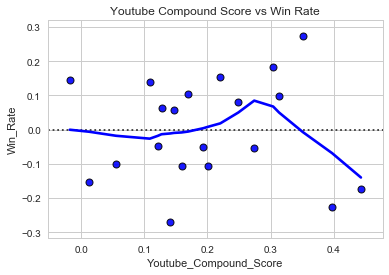

In [9]:
sns.set(style="whitegrid")

# Make an example dataset with y ~ x

x = Merged_df["Youtube_Compound_Score"]
y = Merged_df["Win_Rate"]

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True,color="b", scatter_kws={ 
     "alpha":0.9,"linewidth":1,"edgecolors":'k'})
plt.title("Youtube Compound Score vs Win Rate")
plt.show()  
plt.savefig("YoutubeCompoundScorebyTeam")

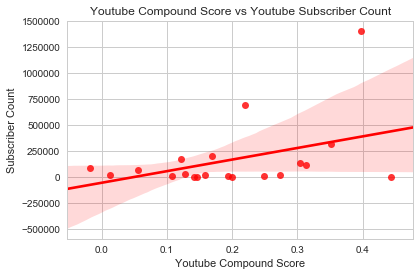

In [10]:
sns.regplot(x="Youtube_Compound_Score", y="Subscriber_Count", data=Merged_df,color="r")

plt.title("Youtube Compound Score vs Youtube Subscriber Count")
plt.xlabel("Youtube Compound Score")
plt.ylabel("Subscriber Count")

# Save our graph and show the grap
plt.tight_layout()
#plt.savefig("YoutubeComvsSub.png")
plt.show()
plt.savefig("YoutubeComScorevsSubscriberCount")

#ANALYSIS: Sentiment generally rises with higher viewership;
# Can have indirect inference that more viewers = higher avg sentiment => more popularity

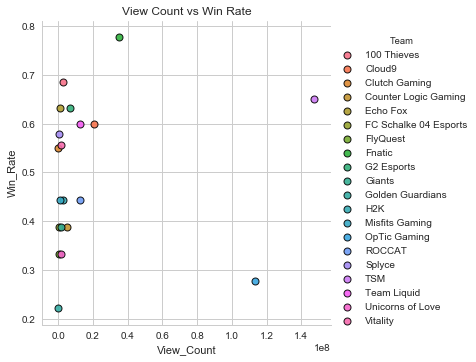

In [11]:
sns.lmplot(x='View_Count', y='Win_Rate', data=Merged_df,
           fit_reg=False,hue='Team'
           ,scatter_kws={ 
           "alpha":0.9,"linewidth":1,"edgecolors":'k'}) 

#Set title for the plot
ax = plt.gca()
ax.set_title("View Count vs Win Rate")
plt.show()
plt.savefig("ViecountvsWinrate")
#ANALYSIS: Weak relationship; limitation of this is that team channels are not split between eSports segments

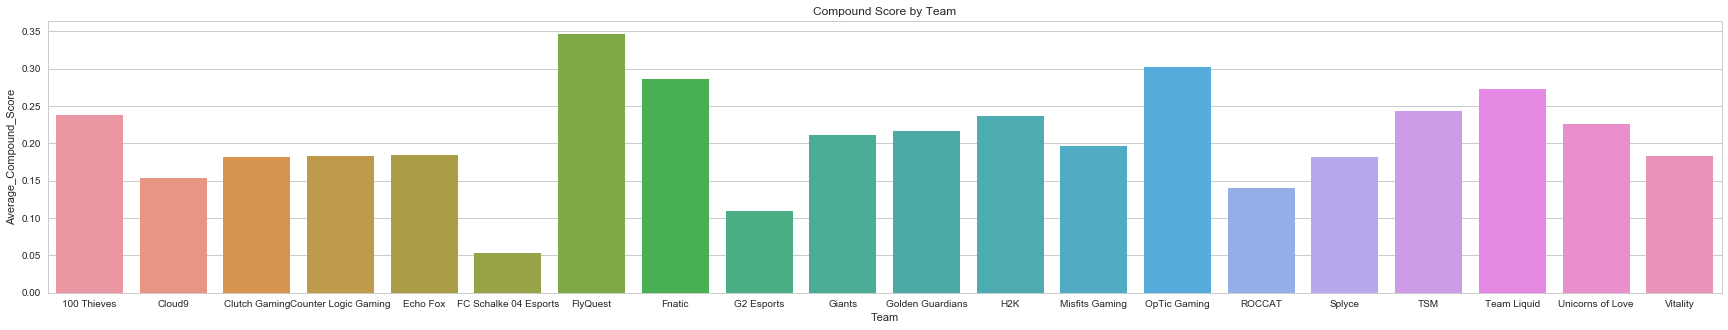

In [12]:
plt.subplots(figsize=(30,5))
sns.barplot(x="Team",y="Average_Compound_Score",data = Merged_df,
           
           )

#Set title for plot
ax = plt.gca()
ax.set_title("Compound Score by Team")
plt.show()
plt.savefig("CompoundScorebyTeam")
#ANALYSIS: Sentiment across teams is varied; According to Vader docs, anything above 0.05 is positive; 
#Cloud9 and FC Shalke fall in the neutral category

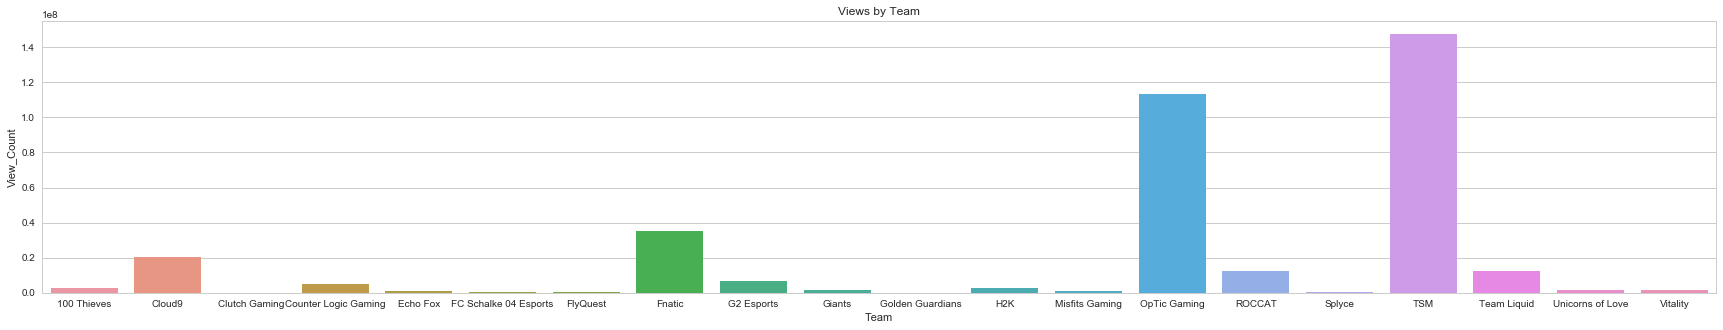

In [13]:
plt.subplots(figsize=(30,5))
sns.barplot(x="Team",y="View_Count",data = Merged_df,
           
           )

#Set title for plot
ax = plt.gca()
ax.set_title("Views by Team")
plt.show()
plt.savefig("ViewsbyTeam")